In [2]:
library(Seurat)
library(Signac)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [21]:
# read rds
sobj <- readRDS('{PATH_1}')
sobj

An object of class Seurat 
345701 features across 7994 samples within 5 assays 
Active assay: chromvar (746 features, 0 variable features)
 1 layer present: data
 4 other assays present: SCT, ATAC, RNA, PRTB
 5 dimensional reductions calculated: integrated_lsi, atac.umap, pca, rna.umap, wnn.umap

In [22]:
DefaultAssay(sobj) <- "SCT"

In [23]:
table(Idents(sobj))


     DASA_NT    DASA_HIC2   DASA_PIAS1    DASA_CHD2 DASA_GPBP1L1   DASA_PQBP1 
        2615          375          309          226          131          102 
  DASA_KMT2B    DASA_SLTM  DASA_PLAGL2  DASA_YEATS4    DASA_ADNP    DASA_BRD2 
         210          221           83          121           15           32 
 DASA_ZNF669   DMSO_KMT2B    DMSO_CHD2      DMSO_NT    DMSO_BRD2 DMSO_GPBP1L1 
          79          152           51         1661          148          222 
   DMSO_HIC2   DMSO_PIAS1   DMSO_ZBED6  DMSO_YEATS4  DMSO_ZNF669    DMSO_ADNP 
         216          299          126          241          121           98 
   DMSO_SLTM     DMSO_MNT 
         113           27 

In [17]:
# get names of unique identities
ident_names <- levels(Idents(sobj))
# print(ident_names)

# subset for string after _ and store as list called genes_to_plot
genes_to_plot <- unique(unlist(lapply(strsplit(ident_names, "_"), function(x) x[length(x)])))
genes_to_plot <- genes_to_plot[genes_to_plot != "NT"]
print(genes_to_plot)


 [1] "HIC2"    "PIAS1"   "CHD2"    "GPBP1L1" "PQBP1"   "KMT2B"   "SLTM"   
 [8] "PLAGL2"  "YEATS4"  "ADNP"    "BRD2"    "ZNF669"  "ZBED6"   "MNT"    


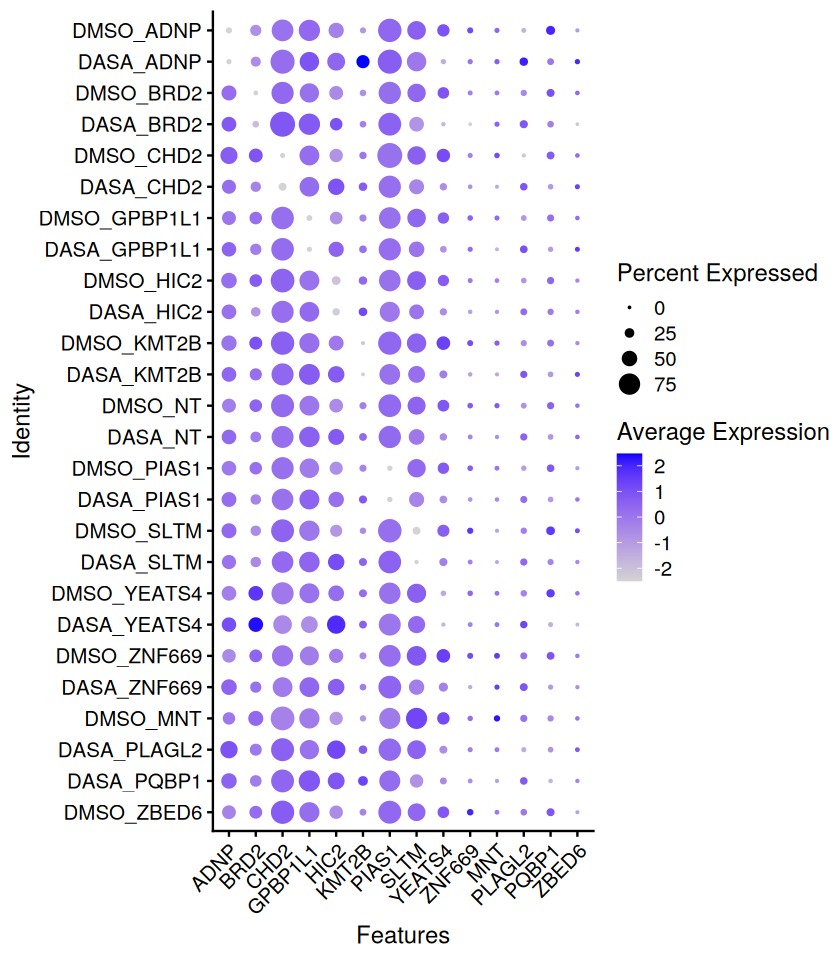

In [41]:
# Function to reorder items (identities or features)
reorder_items <- function(items, ident_names) {
  # Sort items alphabetically (A to Z)
  items <- sort(items)
  
  # Create ordered lists
  paired_items <- c()
  single_items <- c()
  for (item in items) {
    dmso <- paste0("DMSO_", item)
    dasa <- paste0("DASA_", item)
    if (dmso %in% ident_names && dasa %in% ident_names) {
      paired_items <- c(paired_items, item)
    } else {
      single_items <- c(single_items, item)
    }
  }
  
  # Combine paired items first, then single items
  c(paired_items, single_items)
}

# Reorder identities
new_ident_order <- reorder_items(unique(unlist(lapply(strsplit(ident_names, "_"), function(x) x[length(x)]))), ident_names)
new_ident_order <- unlist(lapply(new_ident_order, function(gene) c(paste0("DMSO_", gene), paste0("DASA_", gene))))
new_ident_order <- new_ident_order[new_ident_order %in% ident_names]

# Reorder features (x-axis)
new_feature_order <- reorder_items(genes_to_plot, ident_names)

# Set the new identity order
sobj$reordered_idents <- factor(Idents(sobj), levels = rev(new_ident_order))
Idents(sobj) <- "reordered_idents"

# Create the DotPlot with reordered identities and features
DotPlot(sobj, features = new_feature_order) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [42]:
table(Idents(sobj))


  DMSO_ZBED6   DASA_PQBP1  DASA_PLAGL2     DMSO_MNT  DASA_ZNF669  DMSO_ZNF669 
         126          102           83           27           79          121 
 DASA_YEATS4  DMSO_YEATS4    DASA_SLTM    DMSO_SLTM   DASA_PIAS1   DMSO_PIAS1 
         121          241          221          113          309          299 
     DASA_NT      DMSO_NT   DASA_KMT2B   DMSO_KMT2B    DASA_HIC2    DMSO_HIC2 
        2615         1661          210          152          375          216 
DASA_GPBP1L1 DMSO_GPBP1L1    DASA_CHD2    DMSO_CHD2    DASA_BRD2    DMSO_BRD2 
         131          222          226           51           32          148 
   DASA_ADNP    DMSO_ADNP 
          15           98 